## Objective: to filter out whether incoming text message is spam or not. 
We have an un-structured text massseges and we would like to find a model to categorize the new emails in spam and ham  

### Steps:

It is important to examine the data first to see if any patterns can be recognized so that parsing operations can be optimized. we do that in the exploring data stage. then we follow the follwing steps:

1.	the first thing first, we tokenize our text. Meaning splitting the sentence to the words by taking care of white space or special characters

2.	now that we have a list of tokens/words with some non-important words like stop words (the, and, of,..) or stemming words (learn, learned and learning) that we need to remove them  

3.	then we convert the token to a format that a machine learning algorithm can actually ingest and use to build a model. This is a process called vectorising, and it's basically converting the text to a numeric representation of that text, where we can count the occurrences of each word in each text using a matrix with one row per text and one column per word.

4.	now that we have this numeric matrix, we can fit the actual machine learning model by feeding in the vectorized data along with the spam or ham labels. The model will then learn the relationships between the words and the labels in order to train a model to make predictions on text messages that it has never seen before and determine whether they are spam or not. 


5.  we do the Feature Engineering to find more new features/variables to use in the model to better filter spam messages

6.	we test out a number of candidate machine learning models before selecting which model performs best. Once we select the best model, we’ll evaluate that on a test set, to see how the model will perform on data that it's never seen or touched before. 



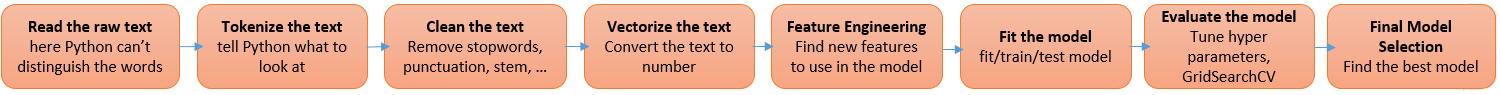




## Download NLTK

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
dir(nltk)

In [3]:
import nltk

from nltk.corpus import stopwords
stopwords.words('english')[0:200:20]

['i', 'himself', 'that', 'a', 'through', 'here', 'own', 're', 'ma']

## Read in semi-structured text data & clean it

In [17]:
# Read in the raw text
rawdata = open(r"C:\Users\solmaz\Desktop\CV\Python\Ex_Files_NLP_Python_ML_EssT\Ex_Files_NLP_Python_ML_EssT\Exercise Files\Ch01\01_03\Start\SMSSpamCollection.tsv").read()

# print the first 500 raw data to understand the data and how we can clean it
rawdata[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [21]:
# we see that the data us semi-structured with two separation '\t' and '\n'
# for first step to structure this dataset, we replace \t with \n, to have just one delimiter  then split the text with \n

parsedata=rawdata.replace("\t", "\n").split('\n')
parsedata[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [25]:
# we create two lists: one we call it label (either ham or spam) the other one is the text itself

labelList=parsedata[0::2]
textList=parsedata[1::2]

print(labelList[0:5])
print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


# we need to combine the two lists, to prepare it for the analysis
import pandas as pd

#we create a dataframe and a dictionary within the dataframe and passe the list in the dictionary 
dataFrame=pd.DataFrame({
    'label': labelList,
    'list': textList
})

dataFrame.head()

In [33]:
# running the last commend gives us the error that "All arrays must be of the same length"
# let's check the lenght of the lists

print(len(labelList))
print(len(textList))

5571
5570


In [34]:
# when we print the last 5 items of the labelList, we see the last item is empty

print(labelList[-5:])

['ham', 'ham', 'ham', 'ham', '']


In [36]:
# we take all the items of labelList except the last one

dataFrame= pd.DataFrame({
    'label': labelList[:-1],
    'text': textList
})

dataFrame.head(5)

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [43]:
# read the dataset

dataset=pd.read_csv(r"C:\Users\solmaz\Desktop\CV\Python\Ex_Files_NLP_Python_ML_EssT\Ex_Files_NLP_Python_ML_EssT\Exercise Files\Ch01\01_03\Start\SMSSpamCollection.tsv", sep="\t",header=None)
dataset.columns= ['label','text']

dataset.head(5)

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


# Explore the dataset  

In [44]:
# how many rows and columns the dataset have?

print("Datasest has {} rows and {} columns".format(len(dataset), len(dataset.columns)))

Datasest has 5568 rows and 2 columns


In [55]:
# how many spam/ham are there?

print("Out of {}, {} are spam, {} are ham".format(len(dataset),
                                                 len(dataset[dataset['label']=='spam']),
                                                 len(dataset[dataset['label']=='ham'])
                                                 )
     )

Out of 5568, 746 are spam, 4822 are ham


In [66]:
# how much missing data is there?

print("Number of null in label: {}".format(dataset['label'].isnull().sum()))
print("Number of null in text: {}".format(dataset['text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


# Tokenize Sentence (Split a sentance into a list of words)

In order to say to Python what to focus on and what to look for we need to split the string into words, so that the model can learn how those words relate to the label (meaning if they are spam or not) 

In this regard, We use re package to search for character patterns, character placement within a string, splitting up the strings, and so on.

###### There are two methods from the re package that can be used for tokenizing. 
1- findall() will search for the actual words while ignoring the things that separate the words, 

2- while split() will search for the characters that split the words while ignoring the actual words themselves 
 and the regexes that are most useful for tokenizing, 

anything using a W is based on words, while anything with an S is based on white spaces. 
 using the W regex because it allows the flexibility for words to be separated by spaces, or special characters. 

###### other useful regex methods in re pakage
re.search()

re.match()

re.fullmatch()

re.finditer()

re.escape()

In [239]:
import pandas as pd

pd.set_option('display.max_columns',100)


### Remove Punctuation

In [70]:
import string

# to see what are the punctuation in python
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [79]:
#define a function to remove the punctuation from text

def remove_punct(text):
    text_nopunct= "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

dataset['text_clean']= dataset['text'].apply(lambda x: remove_punct(x))

dataset.head()

,label,text,text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tokenization

In [82]:
import re

#define a function to split the text into the words
def tokenize(text):
    tokens= re.split('\W+', text)
    return tokens

dataset['tokenized_text']=dataset['text_clean'].apply(lambda x: tokenize(x.lower()))

dataset.head()

,label,text,text_clean,tokenized_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Remove the stop words

It is the processs of removing the words that do not have much meaning such as and, the, of, or,...
With the purpose of reduceing the number of words Python has to look at. 

In [110]:
# NLTK is a python package we use in NLP

import nltk
stopword=nltk.corpus.stopwords.words('english')

In [109]:
import os #it is important to import os, othexise the following lines give
#TypeError: argument of type 'module' is not iterable

#define a function to remove the stop words

def remove_stopwords(tokenized_text): 
        nostopword=[word for word in tokenized_text if word not in stopword]
        return nostopword

dataset['nostopword_text']=dataset['tokenized_text'].apply(lambda x: remove_stopwords(x))

dataset.head()

,label,text,text_clean,tokenized_text,nostopword_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


### Stemming

The process of stemming means often crudely chopping off the end of a word, to leave only the base. 
Meaning taking words with various suffixes and condensing them under the same root word. 
The purpose is to reduce the number of words Python has to look at by reducing variations of the same root word. 

In [114]:
import nltk
ps= nltk.PorterStemmer()

#define a function to stemm the words

def stemming(nostopword_text):
    stemed=[ps.stem(word) for word in nostopword_text]
    return stemed

dataset['stemmedword-text']=dataset['nostopword_text'].apply(lambda x: stemming(x))
dataset.head()

,label,text,text_clean,tokenized_text,nostopword_text,stemmedword-text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


### NOTE 
we see the stemming didn't do very accurate job and it is chopped the end of the words, without any understanding of the context in which a word is used.
a more accurate approch is to use Lemmatizing

### Lemmatizing

lemmatizing is using vocabulary analysis of words to remove inflectional endings and return to the dictionary form of a word. 
Lemmatizing leverages more informed analysis to create groups of words with similar meaning based on the context around the word, part of speech, and other factors. Lemmatizers will always return a dictionary word. 
the downside is that it may be more computationally expensive than stemming 

In [123]:
import nltk
wn= nltk.WordNetLemmatizer()

#define a function to lemmatize the words


def lemmatizing(nostopword):
    lemmatized=[wn.lemmatize(word) for word in nostopword]
    return lemmatized

dataset['lemmatized_text']=dataset['nostopword_text'].apply(lambda x: lemmatizing(x))

dataset.head(10)

,label,text,text_clean,tokenized_text,nostopword_text,stemmedword-text,lemmatized_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
5,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi..."
6,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv...","[winner, valued, network, customer, selected, ..."
7,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,"[had, your, mobile, 11, months, or, more, u, r...","[mobile, 11, months, u, r, entitled, update, l...","[mobil, 11, month, u, r, entitl, updat, latest...","[mobile, 11, month, u, r, entitled, update, la..."
8,ham,I'm gonna be home soon and i don't want to tal...,Im gonna be home soon and i dont want to talk ...,"[im, gonna, be, home, soon, and, i, dont, want...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",SIX chances to win CASH From 100 to 20000 poun...,"[six, chances, to, win, cash, from, 100, to, 2...","[six, chances, win, cash, 100, 20000, pounds, ...","[six, chanc, win, cash, 100, 20000, pound, txt...","[six, chance, win, cash, 100, 20000, pound, tx..."


In [124]:
# drop the stemmedword-text column

dataset.drop(columns=['stemmedword-text'])

,label,text,text_clean,tokenized_text,nostopword_text,lemmatized_text
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"
...,...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, 750, poun...","[2nd, time, tried, 2, contact, u, u, 750, poun..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[will, ü, b, going, to, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[pity, mood, soany, suggestion]"
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, id, interested, b..."


### Vectorizing

It is the process of encoding text as integers to create feature vectors (an n-dimensional vector of numerical features)
we vectorize the text messages to create a matrix that only has numeric entries, then we count how many times each word appears in each text message. 
In this way by founding how frequently the certain words appear, we determine whether the individual text message is spam or not. 
There are different ways to vectorize a text, 3 of them called:

- count vectorization

- N-grams

- TF-IDF

#### Count Vectorization

In [145]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(analyzer=lemmatizing)

X_counts= count_vect.fit_transform(dataset['lemmatized_text'])
print(X_counts.shape)
#print(count_vect.get_feature_names())


(5568, 8912)


##### TF-IDF Vectorization

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=lemmatizing)
X_tfidf = tfidf_vect.fit_transform(dataset['lemmatized_text'])

#print(X_tfidf.shape)
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()


,0,1,2,3,4,5,6,7,8,9,...,8902,8903,8904,8905,8906,8907,8908,8909,8910,8911
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Feature engineering 

Feature engineering  is the process of creating new features and/or transforming existing features to get the most out of your data. We try to find out what other features we might be able to extract from this data that would be helpful to predict spam or ham. 
For instance:
- the length of the text field
- percentage of the punctuation characters
- percentage of capitalized characters
- log transformation of data if we have a very skewed data set with a very long right tail with a lot of outliers
- standardizing your data, or transforming it all to be on the same scale

## Hypothese null 1: spam messages tend to be longer than real text messages 

### Create feature for text message length

In [146]:
dataset['text_len']= dataset['text'].apply(lambda x: len(x)-x.count(" "))
dataset.head()

,label,text,text_clean,tokenized_text,nostopword_text,stemmedword-text,lemmatized_text,text_len
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,...",160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",49
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",28


## Evaluate hypothese 1

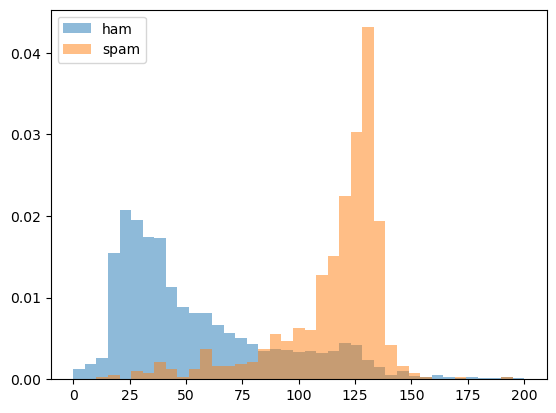

In [160]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins=np.linspace(0, 200, 40)

pyplot.hist(dataset[dataset['label']=='ham']['text_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.hist(dataset[dataset['label']=='spam']['text_len'], bins, alpha=0.5, density=True, label='spam')

pyplot.legend(loc='upper left')
pyplot.show()

### Result of the hypothese 1
we can see that text length is very different for ham versus spam. 
So spam text messages seem to be quite a bit longer than regular text messages. 
So it appears that this extra feature could be really helpful for the model to distinguish ham from spam. 

Conclusion:
spam messages tend to be longer than real text messages


## Hypothese null 2: messages with more punctuations tend to be spams

### Create feature for % of text that is punctuation

In [149]:
def count_punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")) , 3)*100

dataset['punct%']= dataset['text'].apply(lambda x: count_punct(x))
dataset.head()

,label,text,text_clean,tokenized_text,nostopword_text,stemmedword-text,lemmatized_text,text_len,punct%
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]",49,4.1
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",28,7.1


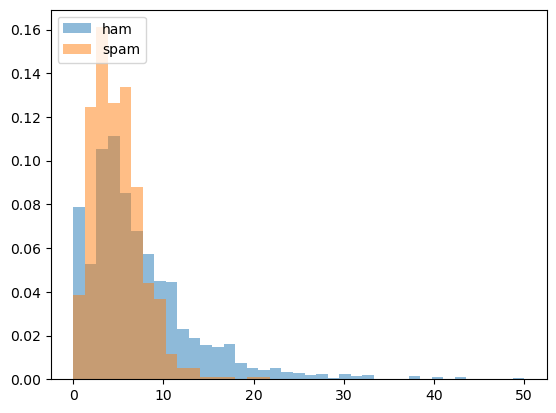

In [164]:
bins=np.linspace(0, 50, 40)

pyplot.hist(dataset[dataset['label']=='ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
pyplot.hist(dataset[dataset['label']=='spam']['punct%'], bins, alpha=0.5, density=True, label='spam')

pyplot.legend(loc='upper left')
pyplot.show()

### Result of the hypothese 2
we can see there's not nearly as much of a difference in punctuation use for ham versus spam messages. 
spam might be a little bit more concentrated here on the left, whereas ham tends to have more of a tail over to the right-hand side. However, this features is not likely help out the model.

Conclusion:
we do not have any reason to support that messages with more punctuations tend to be spams

## identifing features for transformation

### Text Length Distribution

We look at the distribution of the data and see if there is a dramatic skew with a really long tail or a few outliers.

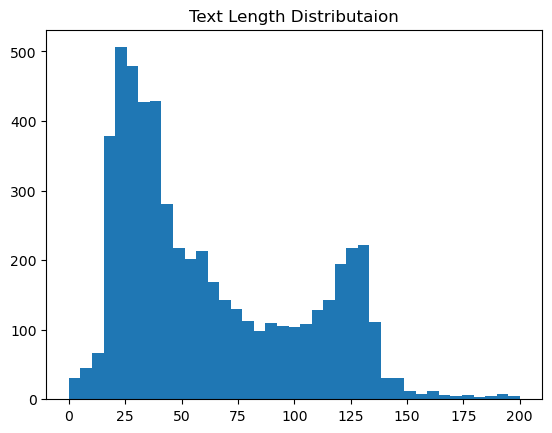

In [171]:
bins= np.linspace(0, 200, 40)

pyplot.hist(dataset['text_len'], bins)
pyplot.title('Text Length Distributaion')
pyplot.show()

####  Conclusion

we see there is a bimodal distribution here with two different spikes. But, this is not a great candidate for transformation because it's not really heavily skewed and there's not really any clear outliers.  

### Punctuation % Distribution

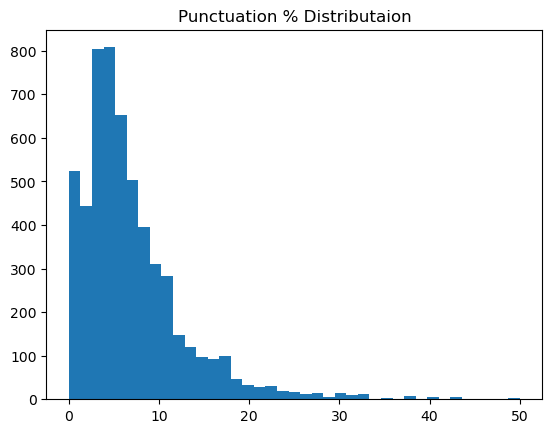

In [173]:
bins= np.linspace(0, 50, 40)

pyplot.hist(dataset['punct%'], bins)
pyplot.title('Punctuation % Distributaion')
pyplot.show()

### Conclusion

The Punctuation % is a good coandidate for distribution transforamtion. It's fairly skewed where we see a lot close to zero and the tail extending all the way up to 40 with some of the outliers.

if we do not the transformation, the generated model may be biased.

## Box-Cox transformation

we need to determine what transformation can transform the current distribution of Punctuation% to a normal distribution.
we set up a loop to loop through some different transformations and just plot the data with that transformation applied.

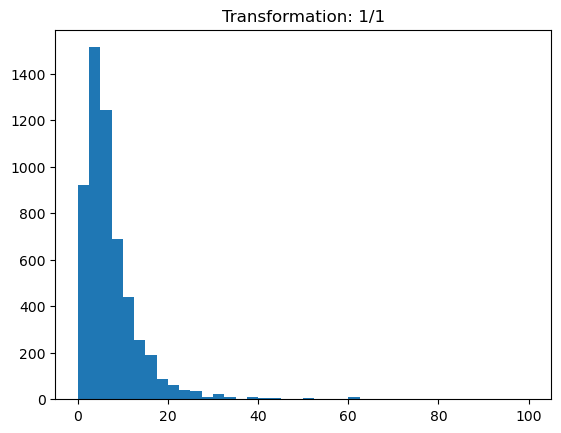

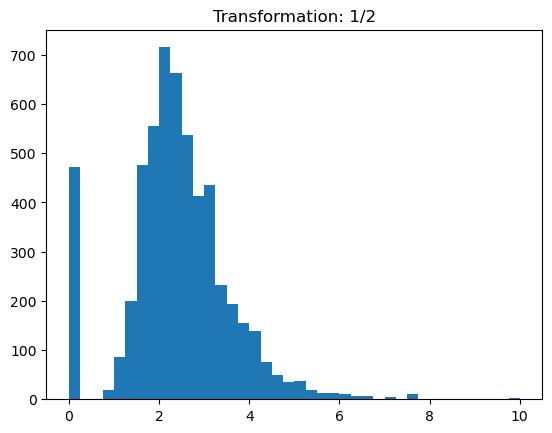

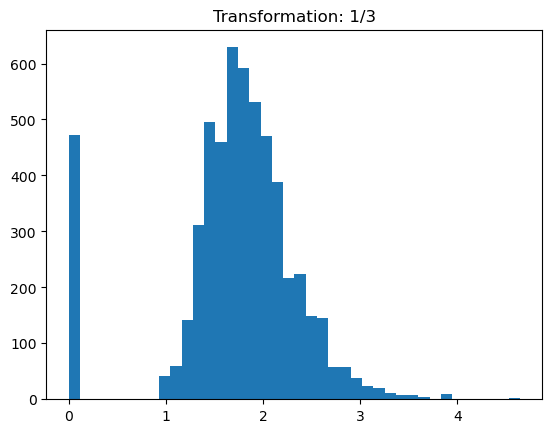

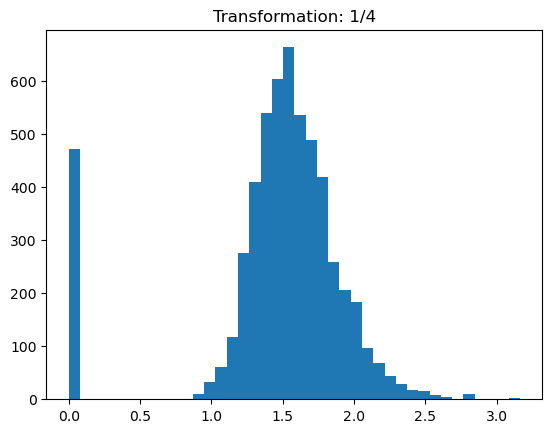

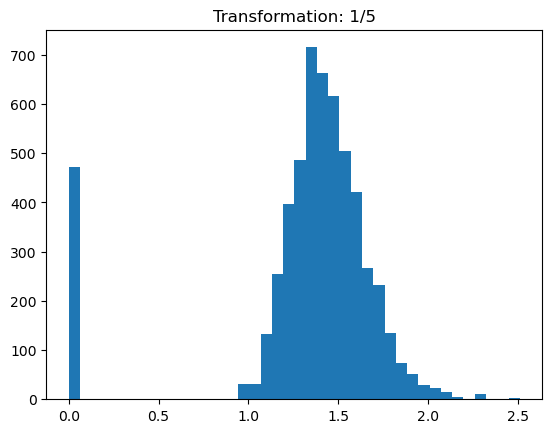

In [175]:
for i in [1, 2, 3, 4, 5]:
    pyplot.hist(dataset['punct%']**(1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

### Conclusion

the first histogram, is the non-transformed one and we see the biger the i is the distribution is closer to the normal one.
the bar in 0 is all the words that are not punctuation.

### Random Forest Machine Learning
    
    Random forest is one type of a machine learning algorithm that falls into a category of ensemble learners. 
    Eensemble method creates multiple models and then combines them to produce better results than any of the single models individually. The idea behind ensemble learning is that you can combine a lot of weak models to create a single strong model.
    
    It's a powerful machine learning algorithm. 
    - it can be used for classification or regression, (a categorical response or a continuous response). 
    - it easily handles outliers, missing values, skewed data, the data doesn't even have to be on the same scale. 
    - it accepts various types of inputs, (ordinal or continuous data). 
    - it's less likely to overfit than some of the other machine learning models. 
    - and it generates a feature importance score for each feature

In [190]:
from sklearn.ensemble import RandomForestClassifier

##### K-Fold Cross Validation
using K-Fold Cross Validation to evaluate our models. In this process the full data set is k-subsets and the holdout method is repeated k times. That is, in each iteration one of the k-subsets is treated as the holdout test set and the other k-1 subsets are put together to train the model. The purpose is that this gives you a little bit more robust read on the performance of the model rather than just having one single hold out test set for the model to be evaluated on. Now you have K test sets and k evaluation metrics to understand the potential performance outcomes. 

##### Ilustartion of 5-fold cross validation

#

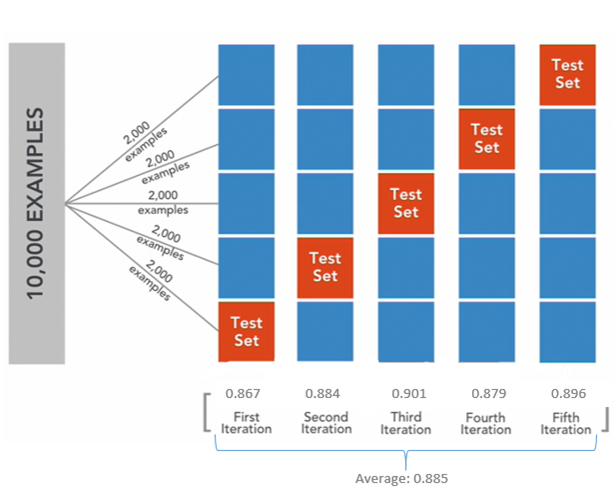


In [213]:
import sklearn
from sklearn.model_selection import KFold, cross_val_score

In [243]:
rf= RandomForestClassifier(n_jobs=-1) # to run faster we determine n_jobs=-1 and let all the folds run parallel
k_fold= KFold(n_splits=5)

X_features = pd.concat([dataset['text_len'], dataset['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.columns = X_features.columns.astype(str)
X_features.head()

cross_val_score(rf, X_features, dataset['label'], cv=k_fold, scoring= 'accuracy', n_jobs=-1)

array([0.97755835, 0.98025135, 0.97396768, 0.96585804, 0.97214735])

#### Split the dataset to train, test

In [248]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split 

# split the dataset to 4 sets to train and test the Random Forest Model 
X_train, X_test, y_train, y_test=train_test_split(X_features, dataset['label'], test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1) 
rf_model= rf.fit(X_train, y_train)

sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.041734513807326276, 'text_len'),
 (0.03952742993894549, '1900'),
 (0.03228762403990117, '8102'),
 (0.030748059913320004, '2155'),
 (0.029033472101700174, '5242'),
 (0.02273673194303798, '3422'),
 (0.02060254783374038, '7438'),
 (0.02044298387094709, '7952'),
 (0.018133165246052373, '6254'),
 (0.016529547995153535, '3751')]

In [250]:
y_pred= rf_model.predict(X_test)

precision, recall, fscore, support= score(y_test, y_pred, pos_label='spam', average='binary')

In [251]:
'Precision: {}, Recall: {}, Accuracy: {}'.format(round(precision,3),
                                                round(recall, 3),
                                                round((y_pred==y_test).sum()/len(y_pred),3))

'Precision: 1.0, Recall: 0.483, Accuracy: 0.933'

#### Conclusion:

The 100% precision means that when the model identified something as spam, it actually was spam 100% of the time. great.
The 55.2% recall means that of all the spam that has come into the email, 55.2% of that spam was properly placed in the spam folder, which means that the other 44.8% went into the inbox, so that's not great. 
The 93.4% accuracy means that of all the emails that came into the email, spam or non-spam, they were identified correctly as one or the other, 93.4% of the time. 

To improve the recall, and decrease the anount of the spam in the inbox, we test different hyperparameter settings.

### Grid-search 

Grid-search means defining a grid of hyperparameter settings, 
and then exploring a model fit with each combination of those hyperparameter settings.
Here, the grid-search will test every combination of n_estimators and max_depth, and fit a model and evaluate it, 
to see which hyperparameter combination generates the best model. 

To use the Grid-Search methode, we need to define the model as a function and then loop it through a loop of the combination of the hyperparameters

##### Define the model as a Function

In [254]:
def train_RF(n_est, depth):
    rf= RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1) 
    rf_model= rf.fit(X_train, y_train)
    y_pred= rf_model.predict(X_test)
    precision, recall, fscore, support= score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {}, Recall: {}, Accuracy: {}'.format(n_est, depth,
                                                                             round(precision,3),
                                                                             round(recall, 3),
                                                                             round((y_pred==y_test).sum()/len(y_pred),3)))

In [258]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0, Recall: 0.172, Accuracy: 0.892
Est: 10 / Depth: 20 ---- Precision: 1.0, Recall: 0.552, Accuracy: 0.942
Est: 10 / Depth: 30 ---- Precision: 0.989, Recall: 0.621, Accuracy: 0.95
Est: 10 / Depth: None ---- Precision: 0.983, Recall: 0.793, Accuracy: 0.971
Est: 50 / Depth: 10 ---- Precision: 1.0, Recall: 0.2, Accuracy: 0.896
Est: 50 / Depth: 20 ---- Precision: 1.0, Recall: 0.593, Accuracy: 0.947
Est: 50 / Depth: 30 ---- Precision: 1.0, Recall: 0.669, Accuracy: 0.957
Est: 50 / Depth: None ---- Precision: 1.0, Recall: 0.786, Accuracy: 0.972
Est: 100 / Depth: 10 ---- Precision: 1.0, Recall: 0.248, Accuracy: 0.902
Est: 100 / Depth: 20 ---- Precision: 1.0, Recall: 0.538, Accuracy: 0.94
Est: 100 / Depth: 30 ---- Precision: 1.0, Recall: 0.697, Accuracy: 0.961
Est: 100 / Depth: None ---- Precision: 1.0, Recall: 0.807, Accuracy: 0.975


#### Result of Grid-search
we see the combination of the n_estimater=100 and max_depth=None gives the better recall
Let's use the GridSearchCV function

In [260]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier()
param= {'n_estimators' : [150, 300],
        'max_depth': [30, 60, 9, None]}
gs= GridSearchCV(rf, param, n_jobs=-1)
gs_fit= gs.fit(X_tfidf, dataset['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,26.673636,2.459820,0.166184,0.025277,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.976661,0.971275,0.964061,0.968553,0.971622,0.005046,1
6,14.870008,0.223798,0.099403,0.008010,None,150,"{'max_depth': None, 'n_estimators': 150}",0.979354,0.973070,0.972172,0.964960,0.967655,0.971442,0.004943,2
3,20.349289,0.428497,0.153353,0.010652,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.976661,0.972172,0.968582,0.962264,0.964061,0.968748,0.005261,3
2,10.135902,0.111309,0.080395,0.008340,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.974865,0.972172,0.967684,0.964061,0.964061,0.968569,0.004337,4
0,6.258746,0.164811,0.059455,0.012591,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.961400,0.959605,0.957810,0.952381,0.951482,0.956536,0.003937,5


#### Result
Based on mean_fit time and split_test_score, the best parameters here are n_estimer= 150 and max_depth= None.